### Time series filtering
This notebook demonstrates the working of the following algorithms:  
* Moving Average filter
* Exponential Moving Average filter
* One Euro filter

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.time_series_filtering import (
    MovingAverageFilter, 
    ExponentialMovingAverageFilter,
    OneEuroFilter
)


RANDOM_SEED = 42
FONT_SCALE = 1.5
PALETTE = 'bright'
LINE_WIDTH = 3
POINTS_SIZE = 20
FIG_SIZE = (15, 8)
N_POINTS = 450
START_POINT = 0
STOP_POINT = 15
NOISE_SCALE_FACTOR = 0.3
OUTPUT_PATH = 'images'

np.random.seed(RANDOM_SEED)
sns.set(font_scale=FONT_SCALE)
sns.set_palette(PALETTE)

#### Visualization functins

In [3]:
def visualize_data(time, original, noised, close=True):
    
    fig, ax1 = plt.subplots(figsize=FIG_SIZE)
    ax2 = sns.lineplot(x=time, y=original, linewidth=LINE_WIDTH, label='original')
    ax3 = sns.scatterplot(x=time, y=noised, s=POINTS_SIZE, color='red', label='noised')
    
    plt.legend(loc='lower left')
        
    if close:
        plt.close()
    
    return fig


def visualize_moving_average_filter(time, original, noised, w):
    moving_average_filter = MovingAverageFilter(filter_window_size=w)
    filtered = [moving_average_filter(value) for value in noised]
    
    fig = visualize_data(time, original, noised, close=False)
    ax = sns.lineplot(x=time, y=filtered, color='green', 
                       linewidth=LINE_WIDTH, label=f'MA (w={w})')
    
    plt.legend(loc='lower left') 
    plt.close()
    
    return fig


def visualize_exponential_moving_average_filter(time, original, noised, alpha):
    exponential_moving_average_filter = ExponentialMovingAverageFilter(alpha=alpha)
    filtered = [exponential_moving_average_filter(value) for value in noised]
    
    fig = visualize_data(time, original, noised, close=False)
    ax = sns.lineplot(x=time, y=filtered, color='green', 
                       linewidth=LINE_WIDTH, label=f'EMA (alpha={alpha})')
    
    plt.legend(loc='lower left')
    plt.close()
    
    return fig


def visualize_one_euro_filter(time, original, noised, f_cmin, beta):
    one_euro_filter = OneEuroFilter(data_frequency=N_POINTS/STOP_POINT, 
                                    min_cutoff_frequency=f_cmin, beta=beta)
    filtered = [one_euro_filter(value, timestamp) for value, timestamp in zip(noised, time)]

    fig = visualize_data(time, original, noised, close=False)
    ax = sns.lineplot(x=time, y=filtered, color='green', 
                       linewidth=LINE_WIDTH, label=f'1euro (f_cmin={f_cmin}, beta={beta})')
    
    plt.legend(loc='lower left')
    plt.close()
    
    return fig

#### Generating and visualizing data

In [4]:
linspace = np.linspace(start=START_POINT, stop=STOP_POINT, num=N_POINTS, endpoint=False)
noise = np.random.normal(scale=NOISE_SCALE_FACTOR, size=(N_POINTS,))

original_data = np.sin(linspace)
noised_data = original_data + noise

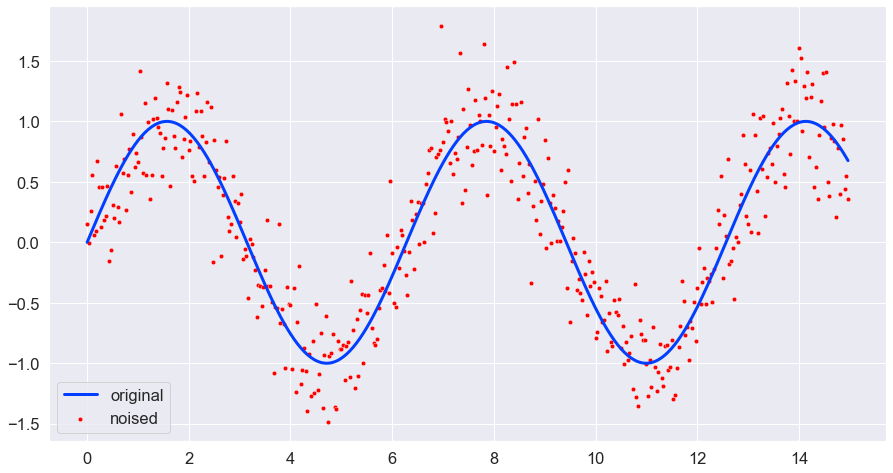

In [5]:
fig = visualize_data(linspace, original_data, noised_data)
fig.savefig(Path(OUTPUT_PATH) / 'data.png', bbox_inches='tight')
fig

#### Visualizing Moving Average filter

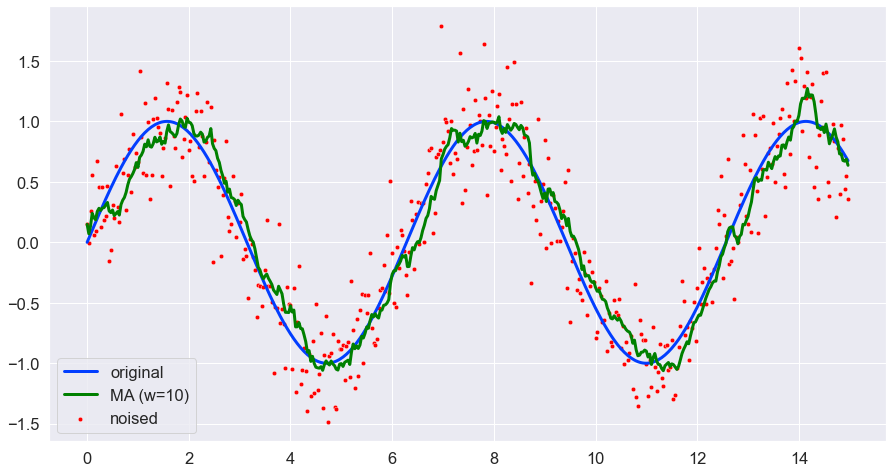

In [6]:
fig = visualize_moving_average_filter(linspace, original_data, noised_data, 10)
fig.savefig(Path(OUTPUT_PATH) / f'moving-average-w-{10}.png', bbox_inches='tight')
fig

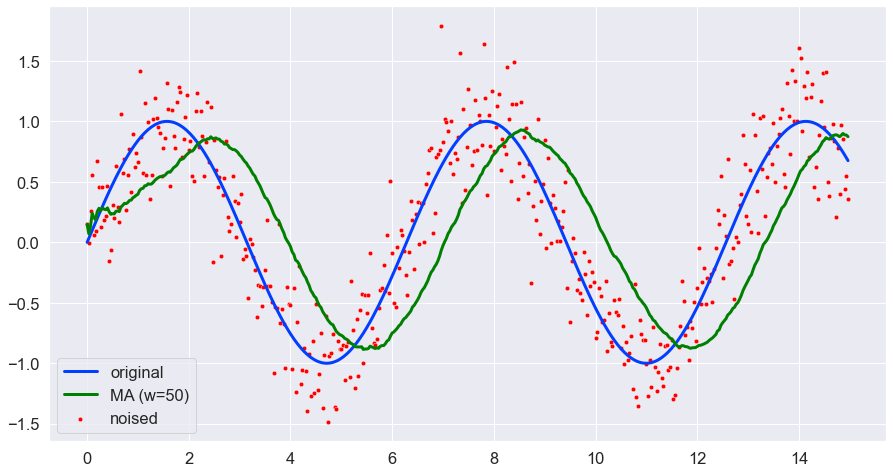

In [7]:
fig = visualize_moving_average_filter(linspace, original_data, noised_data, 50)
fig.savefig(Path(OUTPUT_PATH) / f'moving-average-w-{50}.png', bbox_inches='tight')
fig

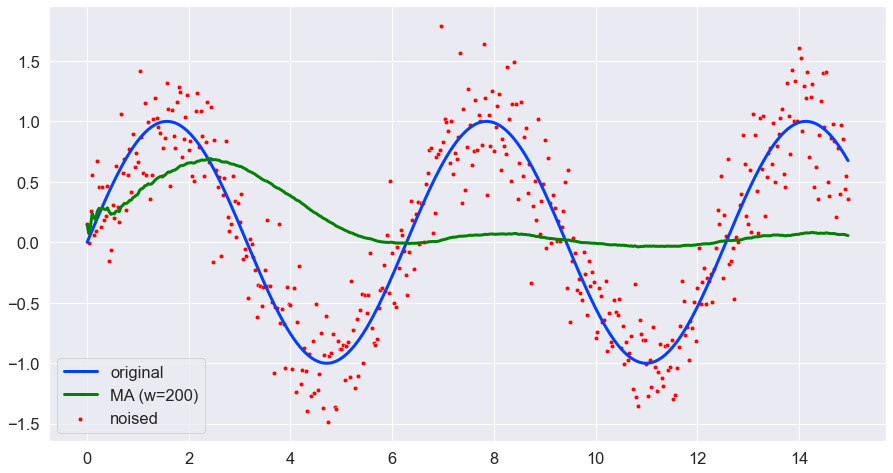

In [8]:
fig = visualize_moving_average_filter(linspace, original_data, noised_data, 200)
fig.savefig(Path(OUTPUT_PATH) / f'moving-average-w-{200}.png', bbox_inches='tight')
fig

#### Visualizing Exponential Moving Average filter

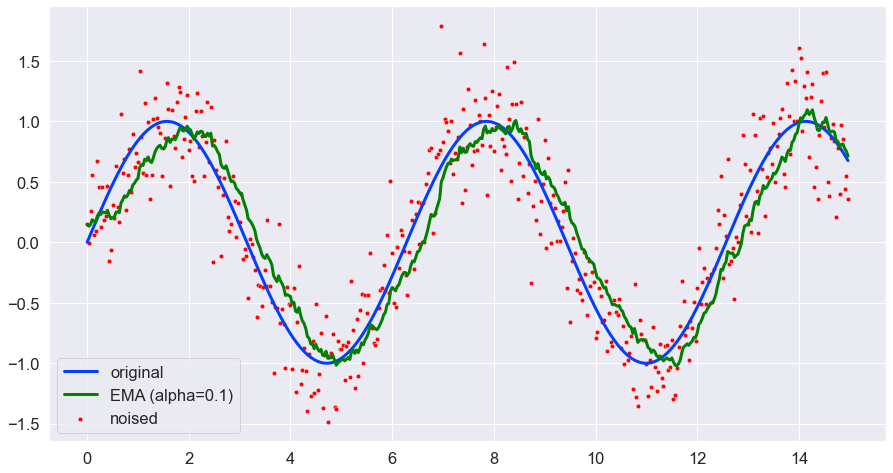

In [9]:
fig = visualize_exponential_moving_average_filter(linspace, original_data, noised_data, 0.1)
fig.savefig(Path(OUTPUT_PATH) / f'exponential-moving-average-alpha-{0.1}.png', bbox_inches='tight')
fig

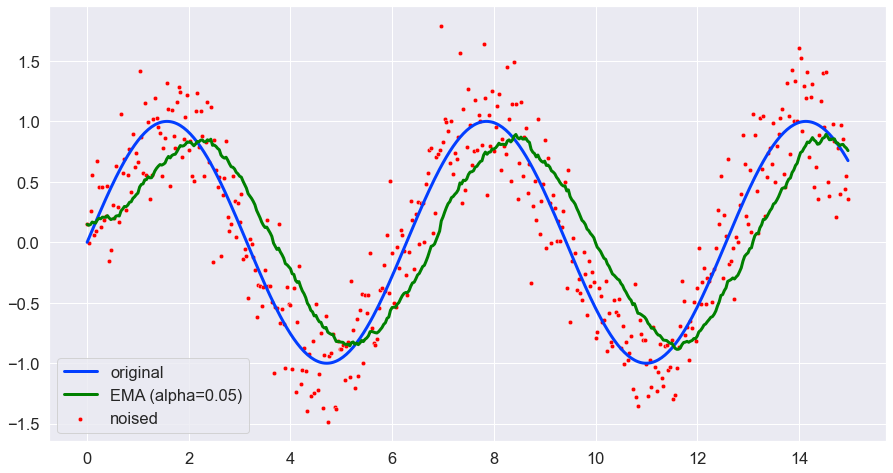

In [10]:
fig = visualize_exponential_moving_average_filter(linspace, original_data, noised_data, 0.05)
fig.savefig(Path(OUTPUT_PATH) / f'exponential-moving-average-alpha-{0.05}.png', bbox_inches='tight')
fig

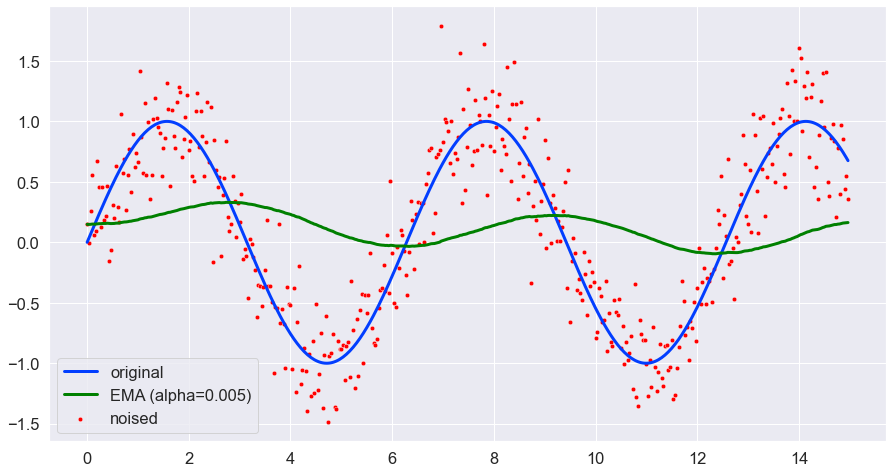

In [11]:
fig = visualize_exponential_moving_average_filter(linspace, original_data, noised_data, 0.005)
fig.savefig(Path(OUTPUT_PATH) / f'exponential-moving-average-alpha-{0.005}.png', bbox_inches='tight')
fig

#### Visualizing One Euro flter

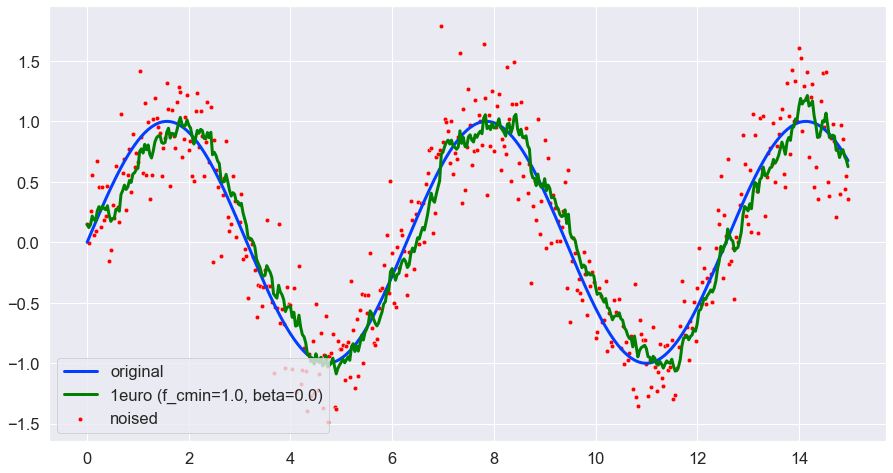

In [12]:
fig = visualize_one_euro_filter(linspace, original_data, noised_data, 1.0, 0.0)
fig.savefig(Path(OUTPUT_PATH) / f'one-euro-f_cmin-{1.0}-beta-{0.0}.png', bbox_inches='tight')    
fig

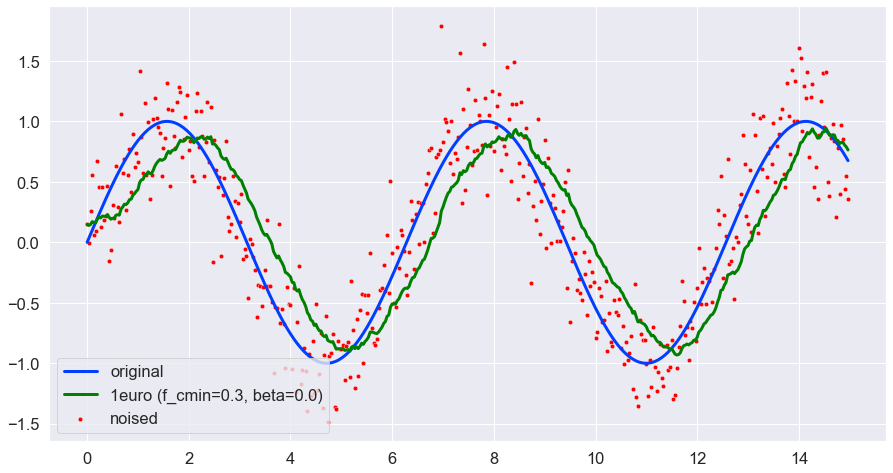

In [13]:
fig = visualize_one_euro_filter(linspace, original_data, noised_data, 0.3, 0.0)
fig.savefig(Path(OUTPUT_PATH) / f'one-euro-f_cmin-{0.3}-beta-{0.0}.png', bbox_inches='tight')    
fig

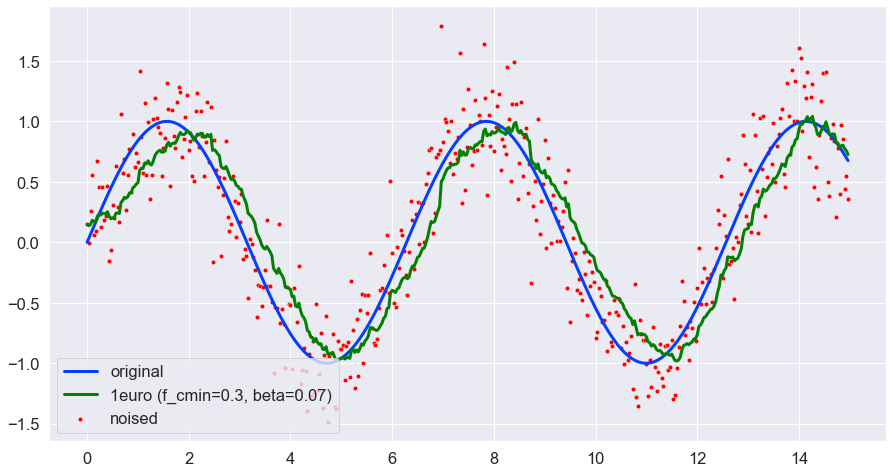

In [14]:
fig = visualize_one_euro_filter(linspace, original_data, noised_data, 0.3, 0.07)
fig.savefig(Path(OUTPUT_PATH) / f'one-euro-f_cmin-{0.3}-beta-{0.07}.png', bbox_inches='tight')    
fig

##### Generating and Visualizing data with dynamic frequency

In [15]:
logspace = np.logspace(start=START_POINT, stop=STOP_POINT, num=N_POINTS, endpoint=False, base=1.2)
noise = np.random.normal(scale=NOISE_SCALE_FACTOR, size=(N_POINTS,))

original_data_dynamic_frequency = np.sin(logspace)
noised_data_dynamic_frequency = original_data_dynamic_frequency + noise

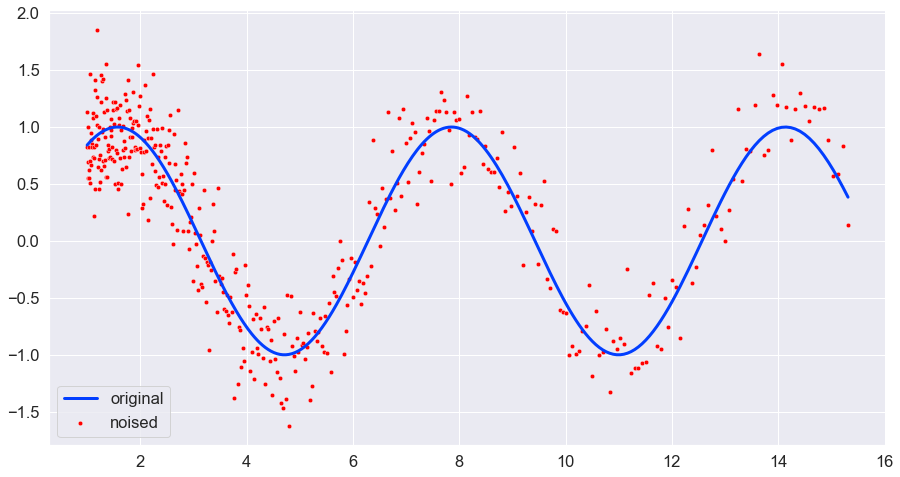

In [16]:
fig = visualize_data(logspace, original_data_dynamic_frequency, noised_data_dynamic_frequency)
fig.savefig(Path(OUTPUT_PATH) / 'data-dynamic-frequency.png', bbox_inches='tight')
fig

#### Visualizing filters for data with dynamic frequency

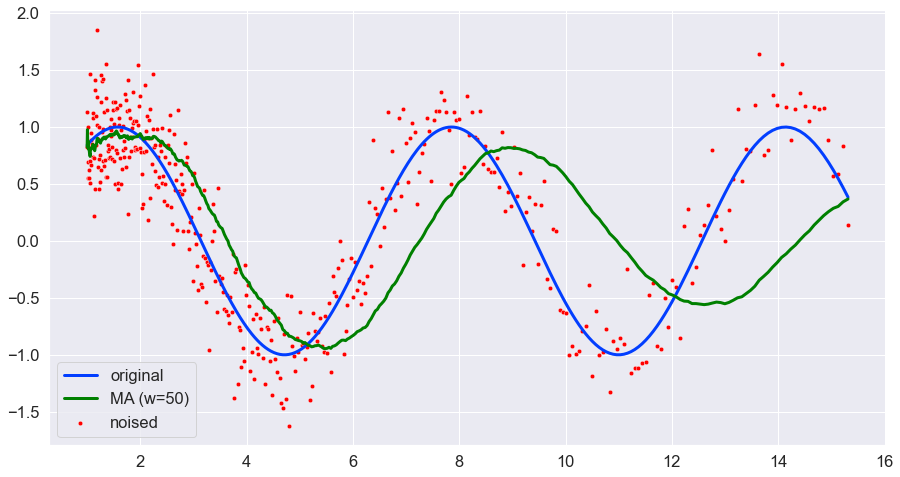

In [17]:
fig = visualize_moving_average_filter(logspace, original_data_dynamic_frequency, 
                                      noised_data_dynamic_frequency, 50)
fig.savefig(Path(OUTPUT_PATH) / f'moving-average-w-{50}-dynamic-frequency.png', 
            bbox_inches='tight')
fig

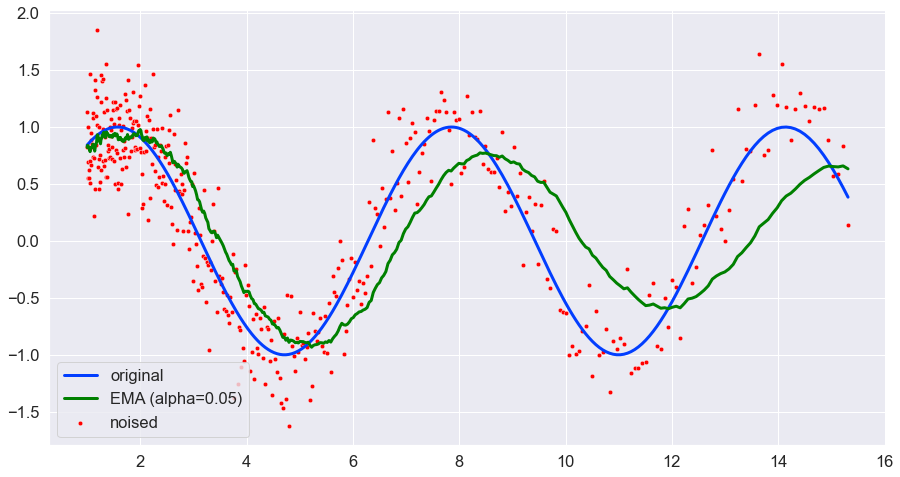

In [18]:
fig = visualize_exponential_moving_average_filter(logspace, original_data_dynamic_frequency, 
                                                  noised_data_dynamic_frequency, 0.05)
fig.savefig(Path(OUTPUT_PATH) / f'exponential-moving-average-alpha-{0.05}-dynamic-frequency.png', 
            bbox_inches='tight')
fig

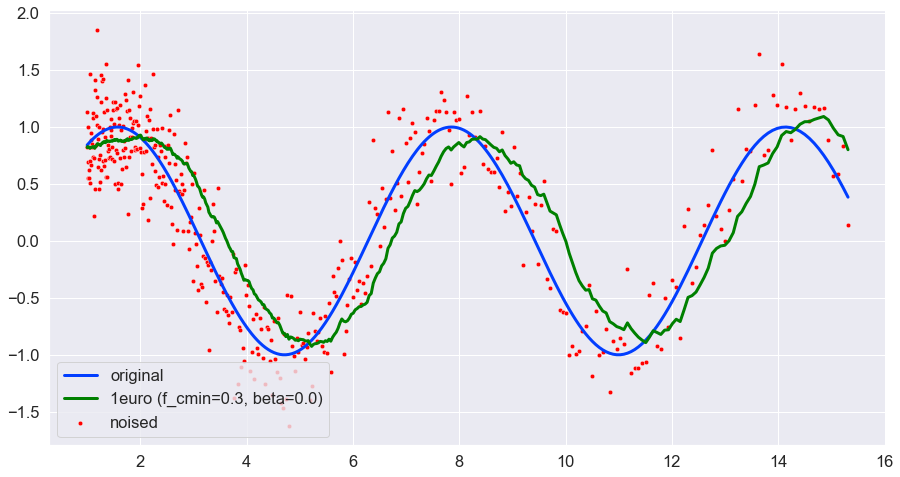

In [19]:
fig = visualize_one_euro_filter(logspace, original_data_dynamic_frequency, 
                                noised_data_dynamic_frequency, 0.3, 0.0)
fig.savefig(Path(OUTPUT_PATH) / f'one-euro-f_cmin-{0.3}-beta-{0.0}-dynamic-frequency.png', 
            bbox_inches='tight')   
fig